# FUNCTION GENERATOR

### get_tickers() retrieves stock data from the API and puts in a cv file, which is downloaded

In [1]:
import requests
import pandas as pd

from bs4 import BeautifulSoup

def get_tickers(ticker):
    
    key = "SPEV9LBW4AJ736U6"
    url = "https://www.alphavantage.co/query"
    params = {"function": "TIME_SERIES_DAILY_ADJUSTED",
             "symbol":ticker,
                "outputsize":"full",
             "apikey":key}
    response = requests.get(url, params = params)
        
    ticker_daily = pd.DataFrame(response.json()["Time Series (Daily)"]).T
    ticker_daily["Ticker"] = response.json()["Meta Data"]["2. Symbol"]
    
    ticker_daily['5. adjusted close'].fillna(method='ffill', inplace=True)

    ticker_daily['returns'] = (ticker_daily['5. adjusted close'].astype("float") / ticker_daily['5. adjusted close'].astype("float").shift(-1)) - 1
    


    ticker_daily_return = ticker_daily[["returns"]].reset_index()
    ticker_daily_return.columns=["date",ticker]
    ticker_daily_return.sort_values(by="date",ascending=True, inplace = True)
    ticker_daily_return.to_csv(ticker+"_returns.csv", index = False)
    
    return ticker_daily_return

### event_table() --> gives the results of the event study in a table

In [2]:
import eventstudy as es
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def event_table(ticker,date,event_start,event_end,est_window):
    import eventstudy as es
    import numpy as np
    import matplotlib.pyplot as plt
    es.Single.import_FamaFrench('famafrench.csv')

    es.Single.import_returns(ticker+"_returns.csv")
    
    event = es.Single.FamaFrench_3factor(
    security_ticker = ticker,
    event_date = np.datetime64(date),
    event_window = (-event_start,+event_end),
    estimation_size = est_window,
    buffer_size = 1)
    
    event_results = event.results(decimals=[3,5,3,5,2,2])
    
    return event_results

### event_plot() --> gives the results of the event study in a plot

In [23]:
def event_plot(ticker,date,event_start,event_end,est_window,return_min, return_max):
    import eventstudy as es
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.pyplot as plt
    es.Single.import_FamaFrench('famafrench.csv')

    es.Single.import_returns(ticker+"_returns.csv")
    
    event = es.Single.FamaFrench_3factor(
    security_ticker = ticker,
    event_date = np.datetime64(date),
    event_window = (-event_start,+event_end),
    estimation_size = est_window,
    buffer_size = 1)
    
    event_plot = event.plot(AR = True, confidence = .80)
    
    
    tabela= get_tickers(ticker)
    
    lista_dates=list(tabela["date"])
    
    event_index=lista_dates.index(date)
    
    dates = []
    i= -event_start-1
    values = []
    for element in lista_dates:
        if element >= lista_dates[event_index-event_start] and element <= lista_dates[event_index+event_end]:
            dates.append(element)
            i+=1
            values.append(i)

    #print(dates)
    #print(values)

    #print(len(dates)==len(values))

    plt.plot_date(dates, values, linestyle='--',color='red')
    
    plt.ylim(return_min,return_max)

   
    plt.gcf().autofmt_xdate()
    plt.xticks(fontsize = 7, rotation = 45)
    plt.xlim(lista_dates[event_index-event_start] ,lista_dates[event_index+event_end-5])
   
    return plt.show()

# EVENT STUDY SIMULATOR

In [54]:
company = "Co"
ticker = "KO"
date = "2022-04-25"
event_start = 5
event_end = 20
est_window= 100
return_min = -0.25
return_max = 0.4

In [49]:
get_tickers(ticker)

,date,TSLA
3171,2010-06-29,NaN
3170,2010-06-30,-0.002512
3169,2010-07-01,-0.078473
3168,2010-07-02,-0.125683
3167,2010-07-06,-0.160937
...,...,...
4,2023-01-27,0.110002
3,2023-01-30,-0.063182
2,2023-01-31,0.039362
1,2023-02-01,0.047281


In [55]:
event_table(ticker,date,event_start,event_end,est_window)

,AR,Std. E. AR,CAR,Std. E. CAR,T-stat,P-value
-5,0.037,0.02807,0.037,0.02807,1.31,0.19
-4,-0.017,0.02807,0.02,0.03969,0.50,0.62
-3,-0.040,0.02807,-0.02,0.04861,-0.41,0.68
-2,0.063,0.02807,0.043,0.05613,0.77,0.45
-1,0.034,0.02807,0.077,0.06276,1.22,0.23
0,-0.037,0.02807,0.04,0.06875,0.58,0.56
1,-0.061,0.02807,-0.022,0.07426,-0.29,0.77
2,0.006,0.02807,-0.016,0.07938,-0.20,0.84
3,-0.048,0.02807,-0.064,0.08420,-0.76,0.45
4,0.046,0.02807,-0.019,0.08875,-0.21,0.83


In [51]:
event_table(ticker,date,event_start,event_end,est_window).to_excel(ticker+"_table.xlsx")

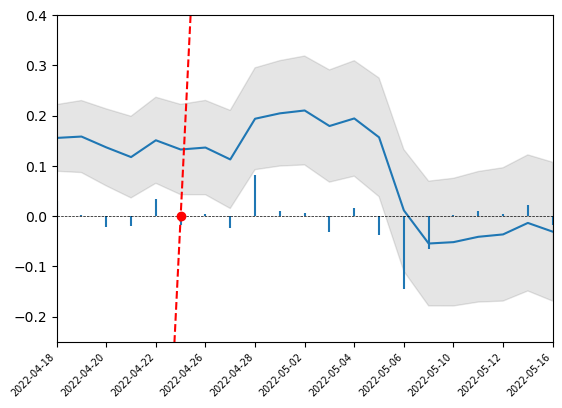

In [46]:
event_plot(ticker,date,event_start,event_end,est_window,return_min,return_max)